<a href="https://colab.research.google.com/github/snackoverflovv/bigdata_contest/blob/main/%EB%B9%85%EB%B6%84%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 지역별·부대별 기상/훈련 데이터 비교

“똑같이 WBGT 28이라도 철원과 해안부대의 실제 체감 환경은 다르다”

→ “전군 동일 기준은 한계가 있다”라는 문제 인식 제시.

*산악 지역(철원) vs 해안지역(고성) vs
내륙지역(춘천)*

(북위 38°~북위 39°에 맞춰 지역 선정)

https://url.kr/hxysgv

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,551 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and dire

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
df = pd.read_csv('/content/ccg_wbgt.csv')

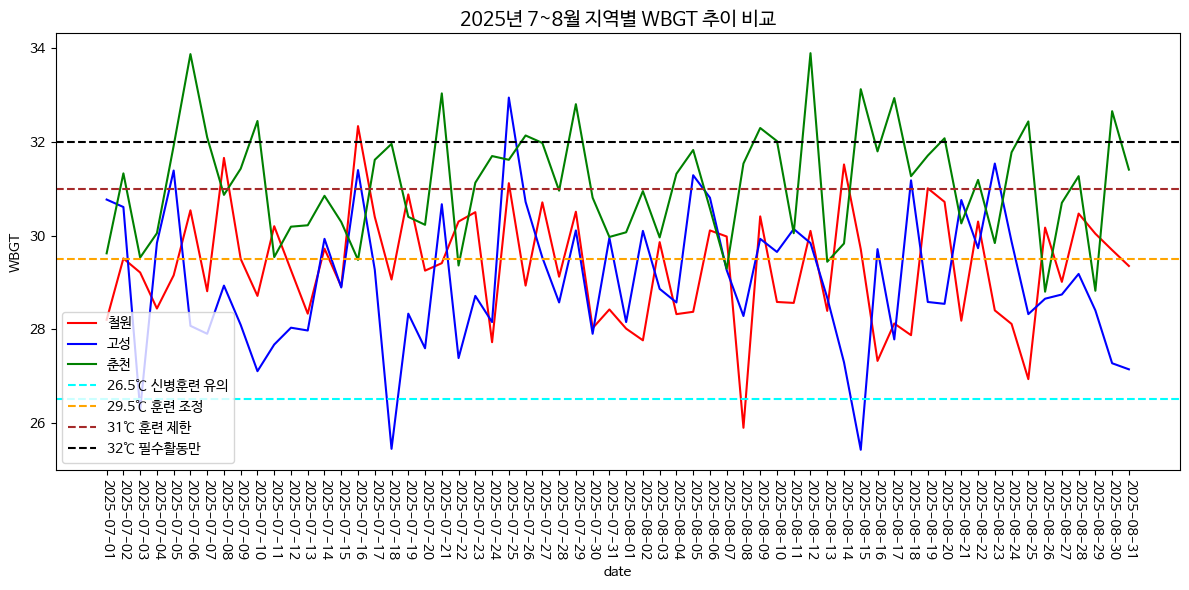

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["Cheorwon"], label="철원", color="red")
plt.plot(df["date"], df["Goseong"], label="고성", color="blue")
plt.plot(df["date"], df["Chuncheon"], label="춘천", color="green")
plt.axhline(26.5, color="cyan", linestyle="--", label="26.5℃ 신병훈련 유의")
plt.axhline(29.5, color="orange", linestyle="--", label="29.5℃ 훈련 조정")
plt.axhline(31, color="brown", linestyle="--", label="31℃ 훈련 제한")
plt.axhline(32, color="black", linestyle="--", label="32℃ 필수활동만")
plt.title("2025년 7~8월 지역별 WBGT 추이 비교", fontsize=14)
plt.xlabel("date")
plt.ylabel("WBGT")
plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
regions = ["Chuncheon", "Cheorwon", "Goseong"]
thresholds = [26.5, 29.5, 31, 32]

summary = {}
for region in regions:
    stats = {
        "평균 WBGT": df[region].mean(),
        "최고 WBGT": df[region].max(),
        "최저 WBGT": df[region].min()
    }
    for thr in thresholds:
        stats[f"{thr}℃ 이상 일수"] = (df[region] >= thr).sum()
    summary[region] = stats

summary_df = pd.DataFrame(summary).round(2).T
print(summary_df)

           평균 WBGT  최고 WBGT  최저 WBGT  26.5℃ 이상 일수  29.5℃ 이상 일수  31℃ 이상 일수  \
Chuncheon    31.11    33.90    28.80         62.0         56.0       33.0   
Cheorwon     29.32    32.34    25.89         61.0         28.0        5.0   
Goseong      29.03    32.95    25.42         59.0         25.0        6.0   

           32℃ 이상 일수  
Chuncheon       14.0  
Cheorwon         1.0  
Goseong          1.0  


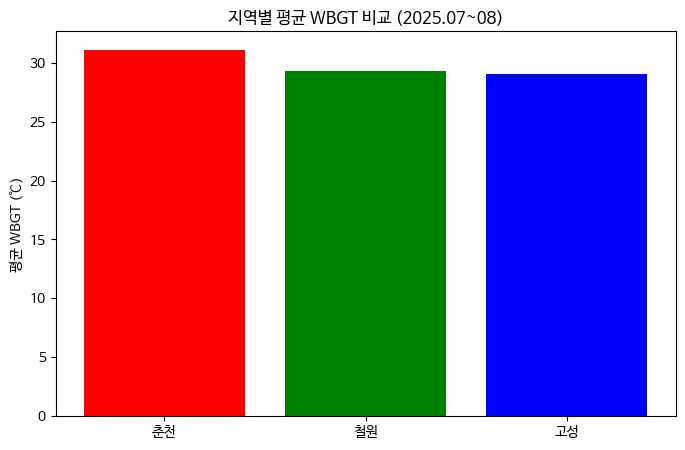

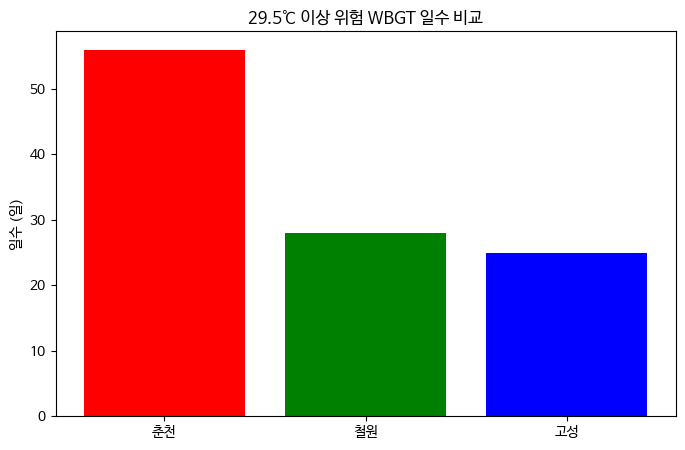

In [5]:
import numpy as np

# 평균 WBGT 비교
means = [df[r].mean() for r in regions]
plt.figure(figsize=(8,5))
plt.bar(["춘천","철원","고성"], means, color=["red","green","blue"])
plt.ylabel("평균 WBGT (℃)")
plt.title("지역별 평균 WBGT 비교 (2025.07~08)")
plt.show()

# 위험일수 (29.5℃ 이상 기준)
risk_days = [(df[r] >= 29.5).sum() for r in regions]
plt.figure(figsize=(8,5))
plt.bar(["춘천","철원","고성"], risk_days, color=["red","green","blue"])
plt.ylabel("일수 (일)")
plt.title("29.5℃ 이상 위험 WBGT 일수 비교")
plt.show()

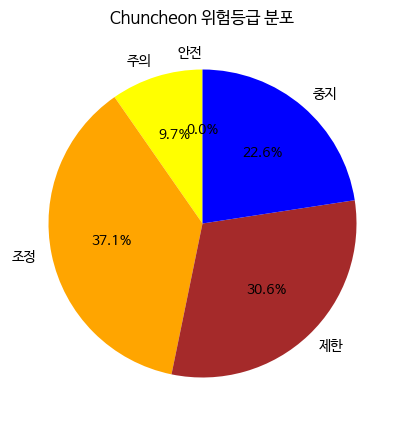

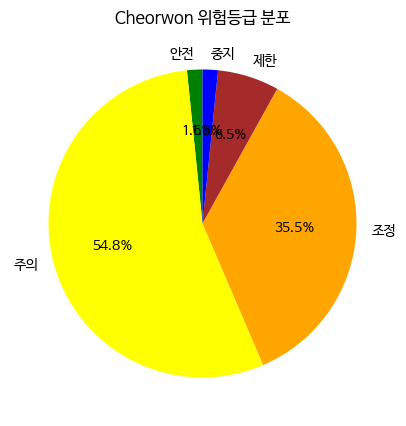

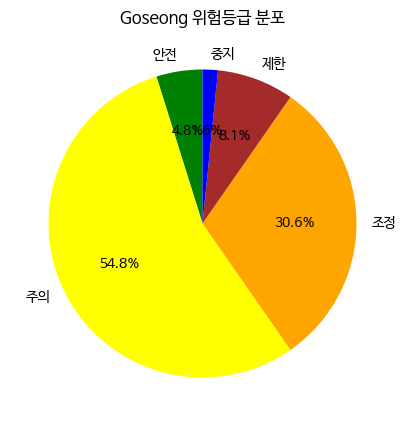

In [6]:
bins = [0, 26.5, 29.5, 31, 32, 50]
labels = ["안전","주의","조정","제한","중지"]

for region in ["Chuncheon","Cheorwon","Goseong"]:
    categories = pd.cut(df[region], bins=bins, labels=labels)
    counts = categories.value_counts().sort_index()

    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=["green","yellow","orange","brown","blue"])
    plt.title(f"{region.replace('_wbgt_c','')} 위험등급 분포")
    plt.show()

춘천은 제한/중지 구간이 많은 반면, 고성은 주의 구간이 다수를 차지함.

# 분석을 통해 확인된 사실

- 지역별 WBGT 차이 존재

    * 동일한 여름 기간(7~8월)에도 춘천 > 철원 > 고성 순으로 WBGT가 높게 나타남.

    * 같은 “29.5℃” 기준을 적용해도 춘천은 위험 일수가 더 많고, 고성은 상대적으로 적음.

- 위험 기준 노출 빈도 차이

    * 춘천 지역 부대는 29.5℃ 이상 일수가 다른 지역보다 현저히 많아, 훈련 제한이 잦음.

    * 반면 고성 지역 부대는 같은 규정 하에 비교적 안전함에도 불구하고 동일한 제한을 받음.

- 전군 일괄 적용의 비효율

    * 동일 기준을 모든 부대에 적용할 경우, 평소 더운 지역의 경우 의미없는 제한이 이루어지지만, 습도 많은 지역의 경우 건구온도가 높게 나와도, 습구 온도가 낮아 WBGT 값이 같은 온도일 때 낮게 나올 수 있기 때문에, 지역 별 차이가 필요함.

## 2. AI 위험성 평가 모델 제작 제안

육군 위험성평가체계(ARAS,
Army Risk Assessment System)
가 존재해서 여기에 추가하면 좋겠다고 하면 될 듯.


먼저 lightbgm 모델 사용.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, precision_recall_curve
import lightgbm as lgb

In [23]:
# 1. 데이터 로드
df = pd.read_csv("heatguard_baseline.csv")

NUM_FEATURES = ["temp_c","rh_pct","wind_ms","cloud_pct","duration_min","heat_index_c","wbgt_c"]
CAT_FEATURES = ["terrain","intensity","kind","time_of_day","base"]
TARGET = "label_heat_injury"

X = df[NUM_FEATURES + CAT_FEATURES]
y = df[TARGET].astype(int)

In [24]:
# 2. 전처리 (수치 표준화 + 범주 원핫인코딩)
numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, NUM_FEATURES),
    ("cat", categorical_transformer, CAT_FEATURES)
])

X_prep = preprocessor.fit_transform(X)
feature_names = NUM_FEATURES + list(preprocessor.named_transformers_["cat"]["ohe"].get_feature_names_out(CAT_FEATURES))

In [25]:
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 4. LightGBM 데이터셋
lgb_train = lgb.Dataset(X_tr, label=y_tr, feature_name=feature_names)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc","binary_logloss"],
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
}

In [26]:
# 불균형 보정
pos = y_tr.sum()
neg = len(y_tr) - pos
if pos > 0:
    params["scale_pos_weight"] = max(1.0, neg/pos)

In [29]:
# 5. 모델 학습
callbacks = [lgb.early_stopping(stopping_rounds=50, verbose=False)]
model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_val], num_boost_round=1000, callbacks=callbacks)

[LightGBM] [Info] Number of positive: 9, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.076271 -> initscore=-2.494123
[LightGBM] [Info] Start training from score -2.494123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [30]:
# 6. 평가
y_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_proba >= 0.5).astype(int)

roc = roc_auc_score(y_test, y_proba)
pr = average_precision_score(y_test, y_proba)
print("ROC-AUC (test):", roc)
print("PR-AUC (test):", pr)
print("\n분류 리포트 (threshold=0.5):\n", classification_report(y_test, y_pred, zero_division=0))

ROC-AUC (test): 0.9857142857142857
PR-AUC (test): 0.75

분류 리포트 (threshold=0.5):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.00      0.00      0.00         3

    accuracy                           0.92        38
   macro avg       0.46      0.50      0.48        38
weighted avg       0.85      0.92      0.88        38



In [31]:
# 7. 최적 임계치(F2 score 기준)
prec, rec, thr = precision_recall_curve(y_val, model.predict(X_val, num_iteration=model.best_iteration))
f2 = (5*prec*rec)/((4*prec) + rec + 1e-12)
best_idx = np.argmax(f2)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5
print("최적 임계치 (F2 기준):", best_thr)

최적 임계치 (F2 기준): 0.37677352709448125


In [32]:
# 8. 모델 저장
model.save_model("lightgbm_heatguard.txt")
print("\n모델 저장 완료: lightgbm_heatguard.txt")


모델 저장 완료: lightgbm_heatguard.txt


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/shap/plots/_force_matplotlib.py:139: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


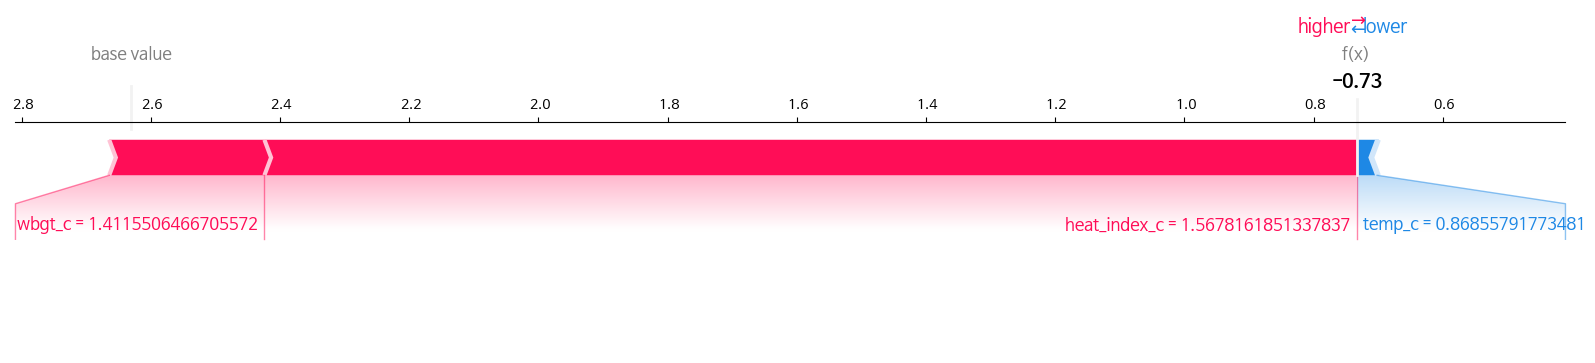

In [39]:
import shap

#Explainer 생성 (학습한 LightGBM 모델 기반)
explainer = shap.TreeExplainer(model)

#테스트 데이터 일부 샘플링
X_sample = X_test[:300]

#SHAP 값 계산
shap_values = explainer.shap_values(X_sample)

#요약 그래프 (전체 변수 중요도)
#shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

#특정 예측에 대한 설명 (첫 번째 케이스 예시)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sample[0,:], feature_names=feature_names, matplotlib=True)

## SHAP 결과로 도출할 수 있는 분석 포인트
1. 변수 중요도 순위 제시\
“WBGT 하나로만 판단하기보다, 실제로는 습구온도와 훈련 강도가 온열손상 위험의 핵심 요인임을 확인했다.”

2. 지역·환경 특성 반영 가능성\
    ex) SHAP 결과에서 base(부대 위치)나 terrain(지형) 변수가 상위권에 뜨면:
→ 지역별 특성이 위험 예측에 직접적 영향을 준다”는 결론 도출 가능.

3. 규정 보완\
예시: SHAP 분석 결과 훈련 시간이 높은 위험도를 설명하는데 기여했음\
=> '현행 규정은 온도 기준 중심이지만, 실제 위험에는 훈련 시간도 큰 영향을 준다.' 라는 사실을 통해 규정 보완의 가능성 확보.

LSTM 모델 사용

In [43]:
!pip install tensorflow

In [45]:
# lstm_heatguard.py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
import json

# --------------------
# 1. 데이터 로드 및 전처리
# --------------------
CSV_PATH = "heatguard_baseline.csv"
df = pd.read_csv(CSV_PATH)

# datetime 분리
df['date'] = pd.to_datetime(df['datetime'].str.split().str[0])  # 2025-07-01
df['time_of_day'] = df['datetime'].str.split().str[-1]          # 아침/점심/저녁
df = df.drop(columns=["datetime"])  # 원래 컬럼 제거

# 훈련 강도 → 숫자 변환
intensity_map = {"저": 1, "중": 3, "고": 5}
df['intensity_num'] = df['intensity'].map(intensity_map).fillna(1)

# 사용할 피처 (수치형 + 범주형 일부 변환)
FEATURES = ["temp_c","rh_pct","wind_ms","cloud_pct","duration_min",
            "heat_index_c","wbgt_c","intensity_num"]

scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])

# --------------------
# 2. 슬라이딩 윈도우 시퀀스 생성
# --------------------
SEQ_LEN = 6   # 과거 6개 이벤트로 다음 이벤트 위험 여부 예측
X_seqs, y_seqs = [], []

# base(부대)별 시계열로 그룹핑
for base, g in df.groupby("base"):
    g = g.sort_values("date")
    arr = g[FEATURES].values
    labels = g["label_heat_injury"].values
    n = len(g)
    if n <= SEQ_LEN:
        continue
    for i in range(n - SEQ_LEN):
        X_seqs.append(arr[i:i+SEQ_LEN])
        y_seqs.append(int(labels[i+SEQ_LEN]))  # 다음 시점 위험 라벨

X = np.array(X_seqs)
y = np.array(y_seqs)
print("데이터 shape:", X.shape, y.shape)

# --------------------
# 3. Train / Test 분리
# --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 클래스 불균형 보정
class_weights = compute_class_weight(class_weight="balanced",
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# --------------------
# 4. LSTM 모델 정의
# --------------------
n_features = X.shape[2]

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(SEQ_LEN, n_features)))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=[tf.keras.metrics.AUC(name="auc")])
model.summary()

# --------------------
# 5. 학습
# --------------------
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
ckpt = ModelCheckpoint("lstm_heatguard_best.h5", save_best_only=True, monitor="val_loss")

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[es, ckpt],
    verbose=2
)

# --------------------
# 6. 평가
# --------------------
y_proba = model.predict(X_test).ravel()
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, precision_recall_curve

print("ROC-AUC (test):", roc_auc_score(y_test, y_proba))
print("PR-AUC (test):", average_precision_score(y_test, y_proba))

# 최적 임계치(F2 기준)
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f2 = (5*prec*rec)/((4*prec)+rec+1e-12)
best_idx = np.argmax(f2)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5
print("최적 임계치(F2 기준):", best_thr)

# --------------------
# 7. 모델 및 스케일러 저장
# --------------------
model.save("lstm_heatguard_final.h5")
with open("lstm_scaler.pkl","wb") as f:
    pickle.dump(scaler, f)
with open("lstm_meta.json","w") as f:
    json.dump({"seq_len": SEQ_LEN, "features": FEATURES, "threshold": float(best_thr)}, f)

print("모델 및 전처리기 저장 완료")


데이터 shape: (168, 6, 8) (168,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 6, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        37,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,537 (162.25 KB)

 Trainable params: 41,537 (162.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2/2 - 11s - 5s/step - auc: 0.5114 - loss: 0.6964 - val_auc: 0.5400 - val_loss: 0.6606
Epoch 2/100


2/2 - 0s - 134ms/step - auc: 0.5587 - loss: 0.6880 - val_auc: 0.6200 - val_loss: 0.6544
Epoch 3/100


2/2 - 0s - 143ms/step - auc: 0.7424 - loss: 0.6648 - val_auc: 0.7300 - val_loss: 0.6479
Epoch 4/100


2/2 - 0s - 143ms/step - auc: 0.8024 - loss: 0.6545 - val_auc: 0.7500 - val_loss: 0.6411
Epoch 5/100


2/2 - 0s - 119ms/step - auc: 0.8712 - loss: 0.6405 - val_auc: 0.7500 - val_loss: 0.6330
Epoch 6/100


2/2 - 0s - 141ms/step - auc: 0.8138 - loss: 0.6370 - val_auc: 0.7800 - val_loss: 0.6244
Epoch 7/100


2/2 - 0s - 202ms/step - auc: 0.7708 - loss: 0.6426 - val_auc: 0.7800 - val_loss: 0.6163
Epoch 8/100


2/2 - 1s - 462ms/step - auc: 0.8232 - loss: 0.6236 - val_auc: 0.7800 - val_loss: 0.6085
Epoch 9/100


2/2 - 1s - 367ms/step - auc: 0.8258 - loss: 0.6109 - val_auc: 0.7800 - val_loss: 0.6012
Epoch 10/100


2/2 - 1s - 292ms/step - auc: 0.8359 - loss: 0.6013 - val_auc: 0.7800 - val_loss: 0.5934
Epoch 11/100


2/2 - 1s - 388ms/step - auc: 0.8163 - loss: 0.5961 - val_auc: 0.7800 - val_loss: 0.5860
Epoch 12/100


2/2 - 1s - 435ms/step - auc: 0.7835 - loss: 0.6051 - val_auc: 0.7800 - val_loss: 0.5786
Epoch 13/100


2/2 - 0s - 131ms/step - auc: 0.8245 - loss: 0.5824 - val_auc: 0.7700 - val_loss: 0.5714
Epoch 14/100


2/2 - 0s - 151ms/step - auc: 0.8188 - loss: 0.5776 - val_auc: 0.7700 - val_loss: 0.5645
Epoch 15/100


2/2 - 0s - 132ms/step - auc: 0.8258 - loss: 0.5671 - val_auc: 0.7600 - val_loss: 0.5575
Epoch 16/100


2/2 - 0s - 156ms/step - auc: 0.8251 - loss: 0.5592 - val_auc: 0.7400 - val_loss: 0.5504
Epoch 17/100


2/2 - 0s - 217ms/step - auc: 0.8314 - loss: 0.5578 - val_auc: 0.7200 - val_loss: 0.5433
Epoch 18/100


2/2 - 0s - 170ms/step - auc: 0.8232 - loss: 0.5606 - val_auc: 0.7100 - val_loss: 0.5365
Epoch 19/100


2/2 - 1s - 442ms/step - auc: 0.8428 - loss: 0.5373 - val_auc: 0.7100 - val_loss: 0.5296
Epoch 20/100


2/2 - 0s - 250ms/step - auc: 0.8321 - loss: 0.5396 - val_auc: 0.7000 - val_loss: 0.5232
Epoch 21/100


2/2 - 1s - 290ms/step - auc: 0.8731 - loss: 0.5150 - val_auc: 0.6900 - val_loss: 0.5176
Epoch 22/100


2/2 - 0s - 232ms/step - auc: 0.8756 - loss: 0.4995 - val_auc: 0.6800 - val_loss: 0.5127
Epoch 23/100


2/2 - 1s - 253ms/step - auc: 0.8883 - loss: 0.4889 - val_auc: 0.6800 - val_loss: 0.5081
Epoch 24/100


2/2 - 0s - 133ms/step - auc: 0.8971 - loss: 0.4720 - val_auc: 0.6800 - val_loss: 0.5037
Epoch 25/100


2/2 - 0s - 188ms/step - auc: 0.8952 - loss: 0.4766 - val_auc: 0.6800 - val_loss: 0.4996
Epoch 26/100


2/2 - 0s - 220ms/step - auc: 0.9091 - loss: 0.4677 - val_auc: 0.6700 - val_loss: 0.4972
Epoch 27/100


2/2 - 0s - 229ms/step - auc: 0.9217 - loss: 0.4468 - val_auc: 0.6600 - val_loss: 0.4958
Epoch 28/100


2/2 - 0s - 149ms/step - auc: 0.9236 - loss: 0.4360 - val_auc: 0.6600 - val_loss: 0.4958
Epoch 29/100
2/2 - 0s - 115ms/step - auc: 0.9381 - loss: 0.4157 - val_auc: 0.6400 - val_loss: 0.4965
Epoch 30/100
2/2 - 0s - 155ms/step - auc: 0.9331 - loss: 0.4090 - val_auc: 0.6400 - val_loss: 0.4973
Epoch 31/100
2/2 - 0s - 142ms/step - auc: 0.9337 - loss: 0.3961 - val_auc: 0.6400 - val_loss: 0.4994
Epoch 32/100
2/2 - 1s - 267ms/step - auc: 0.9489 - loss: 0.3787 - val_auc: 0.6400 - val_loss: 0.5022
Epoch 33/100
2/2 - 0s - 103ms/step - auc: 0.9426 - loss: 0.3785 - val_auc: 0.6300 - val_loss: 0.5047
Epoch 34/100
2/2 - 0s - 152ms/step - auc: 0.9634 - loss: 0.3442 - val_auc: 0.6200 - val_loss: 0.5089
Epoch 35/100
2/2 - 0s - 246ms/step - auc: 0.9602 - loss: 0.3372 - val_auc: 0.6200 - val_loss: 0.5153
Epoch 36/100
2/2 - 0s - 186ms/step - auc: 0.9628 - loss: 0.3213 - val_auc: 0.6000 - val_loss: 0.5198
Epoch 37/100
2/2 - 0s - 170ms/step - auc: 0.9659 - loss: 0.3130 - val_auc: 0.6000 - val_loss: 0.5220
Epo

ROC-AUC (test): 0.5698924731182795
PR-AUC (test): 0.4066666666666666
최적 임계치(F2 기준): 0.2866376
모델 및 전처리기 저장 완료
